In [3]:
from IPython.display import HTML
file_path = 'homework3_part2_images/expl_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [4]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt


# LETS IMPLEMENT ALSO SGD WITH momentum,adam ecc


In [64]:
def sgd_optimizer(loss, grad_loss, w0, D, alpha, batch_size, n_epochs):
    X, y = D  # Unpack the data
    N = X.shape[1]
    d = w0.shape[1]
    idx = np.arange(0, N)
    
    # Initialization of history vectors
    w_history = np.zeros((n_epochs, d))  # Save weights at each iteration
    loss_history = np.zeros((n_epochs, ))  # Save loss values at each iteration
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each iteration
    
    # Initialize weights
    w = w0
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)
        X = X[:,idx]
        y = y[idx,:]
    
        # Initialize a vector that saves the gradient of the loss at each iteration
        grad_loss_vec = []
    
        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[:,batch_start:batch_end]
            y_batch = y[:,batch_start:batch_end]

           # Compute the gradient of the loss",
            gradient = grad_loss(w, X_batch, y_batch)
            grad_loss_vec.append(np.linalg.norm(gradient, 2))

            # Update weights",
            w = w - alpha *  gradient
    
            # Save the updated values"
            w_history[epoch] = w
            loss_history[epoch] = loss(w, X, y)
            grad_norm_history[epoch] = np.mean(grad_loss_vec)

    return w_history, loss_history, grad_norm_history

  

In [ ]:
def SGD(l,grad_l,w0,data,alpha,batch_size,n_epochs):
    X,y = data
    N = X.shape[1]
    w = w0
    for epoch in range(n_epochs):
        # randomize the datas
        indices = np.random.permutation(y.shape[1])
        x_new = X[indices]
        y_new = y[indices]

        for i in range(0,N,batch_size):
            x_new = X[:,i:i+batch_size]
            y_new = y[:,i:i+batch_size]
            w = w - alpha * grad_l()


            





In [67]:
dataset = scipy.io.loadmat('MNIST.mat')
X = dataset['X']
I = dataset['I']
print("Shape of X (images):", X.shape)
print("Shape of I (labels):", I.shape)

Shape of X (images): (256, 1707)
Shape of I (labels): (1, 1707)


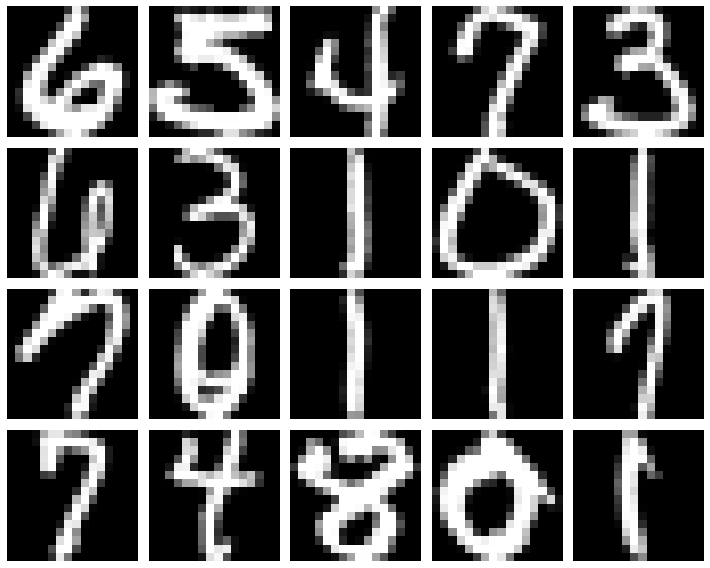

In [68]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.flatten()
for i in range(20):
    img = X[:, i].reshape(16,16)
    ax = axes[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [69]:
digit1 = int(input('Enter the first digit to select :'))
digit2 = int(input('Enter the second digit to select :'))
digits_cols = [i for i in range(X.shape[1]) if I[0][i] == digit1 or I[0][i] == digit2]
X = X[:,digits_cols]
I = I[:,digits_cols]
print(X.shape,I.shape)

(256, 210) (1, 210)


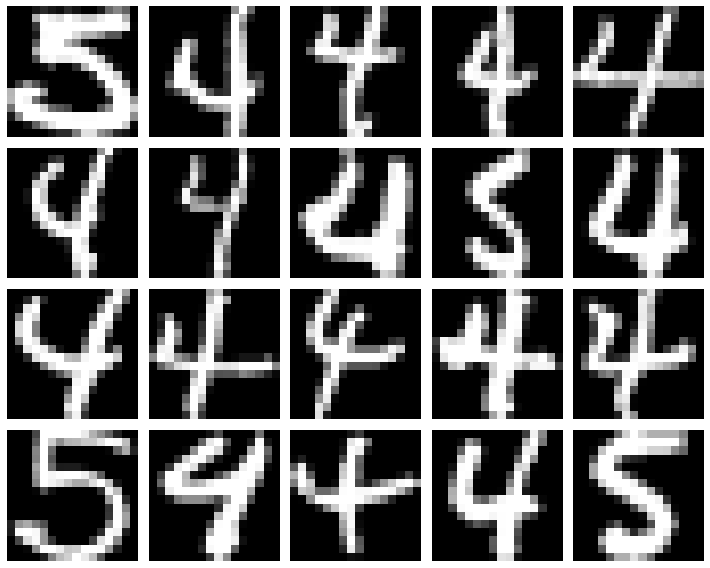

In [70]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.flatten()
for i in range(20):
    img = X[:, i].reshape(16,16)
    ax = axes[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [72]:
# I'm going to use a 80% of data in the dataset X for the train and 20% for the test.

train_elements = int(X.shape[1] * 0.8)


X_train = X[:,:train_elements]
Y_train = I[:,:train_elements]

X_test = X[:,train_elements:]
Y_test = I[:,train_elements:]

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(256, 168) (1, 168) (256, 42) (1, 42)


In [73]:
#Define the Sigmoid Function
def sigmoid(z):
    return 1 / (1+np.exp(-z))

# Compute the value of f
def f(w, X):
    return sigmoid(np.dot(w.T, X))


#Define the loss Function
def loss_mse(w,X,Y):
    N = X.shape[1]
    y_pred = f(w,X)
    loss = (1/2*N) * np.sum((y_pred - Y) ** 2)
    return loss

#Define the gradient of the loss function 
def grad_loss_mse(w,X,Y):
    N = X.shape[1]
    y_pred = sigmoid(np.dot(w.T,X))
    sigma_prime = y_pred * (1 - y_pred)
    #sum is done in .dot
    gradient = (1/N) * np.dot(X, sigma_prime * (y_pred - Y).T)
    return gradient


In [75]:
#Prepare the Data:
bias = np.ones((X.shape[0], 1))
X_bias = np.hstack((bias,X))
#Initialize the Weights:
w0 = np.zeros((X.shape[0],1))
#Training Loop
alpha = 0.01  # Learning rate
batch_size = 64
n_epochs = 100
D = (X_bias, I)
w_history, loss_history, grad_norm_history = sgd_optimizer(loss_mse, grad_loss_mse, w0, D, alpha, batch_size, n_epochs)


IndexError: index 172 is out of bounds for axis 0 with size 1